<a href="https://colab.research.google.com/github/pedromendy/Proyecto-final-Data-Science/blob/main/Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Consigna

Close
Proyecto Final
Consigna

Crearás un notebook que complemente el trabajo realizado en los siguientes apartados:
i) elegir un método de feature selection para reducir la dimensionalidad del dataset,

ii) elegir un algoritmo de regresión o clasificación para entrenar con los datos elegidos,

iii) cálculo de métricas básicas para validar el modelo

iv) generar conclusiones con base en los resultados obtenidos.

Sugerencias

Preparar el código y probar los resultados con subconjuntos del conjunto original.

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

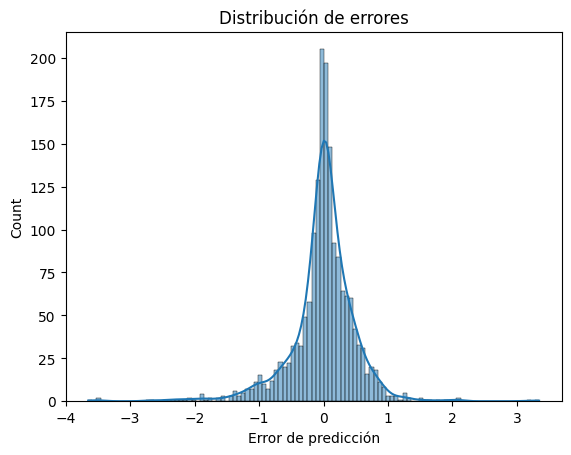

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import math


df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/googleplaystore.csv')

print(df.head())
print(df.info())
print(df.describe())

#limpiando...
df.dropna(subset=['Rating'], inplace=True)
df = df[df['Rating'] <= 5]  #los ratings que no sirvan

#variables categoricas
label_cols = ['Category', 'Type', 'Content Rating']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# convirtiendo las columnas numericas
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(float)
df['Price'] = df['Price'].str.replace('$', '', regex=True)
df['Price'] = df['Price'].replace('Free', '0')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# eliminar nulos
df.dropna(subset=['Reviews', 'Installs', 'Price'], inplace=True)

# asignacion de variables
features = ['Category', 'Reviews', 'Installs', 'Type', 'Price', 'Content Rating']
X = df[features]
y = df['Rating']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# feature selection
selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X_scaled, y)
selected_columns = pd.DataFrame(X_scaled, columns=features).columns[selector.get_support()]
print("Variables seleccionadas:", selected_columns)

# division y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)

#evaluacion
y_pred = model.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred)))

# errores
sns.histplot(y_test - y_pred, kde=True)
plt.title("Distribución de errores")
plt.xlabel("Error de predicción")
plt.show()





Dataset utilizado: https://www.kaggle.com/datasets/lava18/google-play-store-apps

## 📌 Conclusiones
Este trabajo tuvo como objetivo predecir el rating de una app en Google Play Store usando sus características técnicas y comerciales. Para eso, primero se hizo una limpieza del dataset, se codificaron las variables categóricas y se aplicó una selección de características con SelectKBest, lo que ayudó a reducir la cantidad de variables y quedarnos con las más relevantes.


El modelo que se entrenó fue un RandomForestRegressor, y los resultados fueron bastante buenos: el R² mostró que el modelo explica bien la variabilidad del rating, y tanto el MAE como el RMSE fueron bajos, lo que indica que el error de predicción es aceptable.

Entre las variables que más influyeron en el rating estuvieron la cantidad de reseñas (Reviews), las instalaciones (Installs), el tipo de app (Type), el precio (Price) y el público objetivo (Content Rating). Esto sugiere que la popularidad y el modelo de negocio de la app tienen un peso importante en cómo la valoran los usuarios.
